In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/Flipkart_Mobiles (1).csv')

In [ ]:
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [ ]:
df.shape

(3114, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [ ]:
df.isna().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

here we can see in memory 43 null values,storage has 39 and rating 144 null values.

In [ ]:
df['Rating'].fillna('Unkown',inplace=True)
df['Memory'].fillna('4 GB',inplace=True)
df['Storage'].fillna('64 GB',inplace=True)

In [ ]:
df.isna().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [ ]:
df.describe()

,Selling Price,Original Price
count,3114.000000,3114.000000
mean,26436.625562,28333.473025
std,30066.892622,31525.599889
min,1000.000000,1000.000000
25%,9990.000000,10030.250000
50%,15000.000000,16889.500000
75%,28999.000000,31500.000000
max,179900.000000,189999.000000


In [ ]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [ ]:
fig=px.bar(df,x='Brand',y='Selling Price',color='Brand',title='Different Price range segments for mobiles in India')
fig.show()


The highest price rate in India apple,google pixel,IQoo etc.The lowest rates phones are gionee,nokia,lenovo etc.

In [ ]:
g=df.groupby(['Brand'])
g

In [ ]:
for Brand,Brand_df in g:
  print(Brand)
  print(Brand_df)

ASUS
     Brand                     Model          Color Memory Storage  Rating  \
382   ASUS              ROG Phone 5           Black   8 GB  128 GB     4.3   
383   ASUS              ROG Phone 3           Black  12 GB  128 GB     4.4   
384   ASUS       Zenfone Max Pro M1            Grey   4 GB   64 GB     4.3   
385   ASUS  Zenfone 2 Laser ZE500KL           Black   2 GB   16 GB     4.1   
386   ASUS              ROG Phone 3           Black   8 GB  128 GB     4.4   
...    ...                       ...            ...    ...     ...     ...   
3031  ASUS                    ROG 5s    Storm White   8 GB  128 GB  Unkown   
3032  ASUS                    ROG 5s  Phantom Black   8 GB  128 GB  Unkown   
3033  ASUS                    ROG 5s    Storm White  12 GB  256 GB  Unkown   
3034  ASUS                    ROG 5s  Phantom Black  12 GB  256 GB  Unkown   
3035  ASUS                ROG 5s Pro  Phantom Black  18 GB  512 GB  Unkown   

      Selling Price  Original Price  
382           49999 

[]

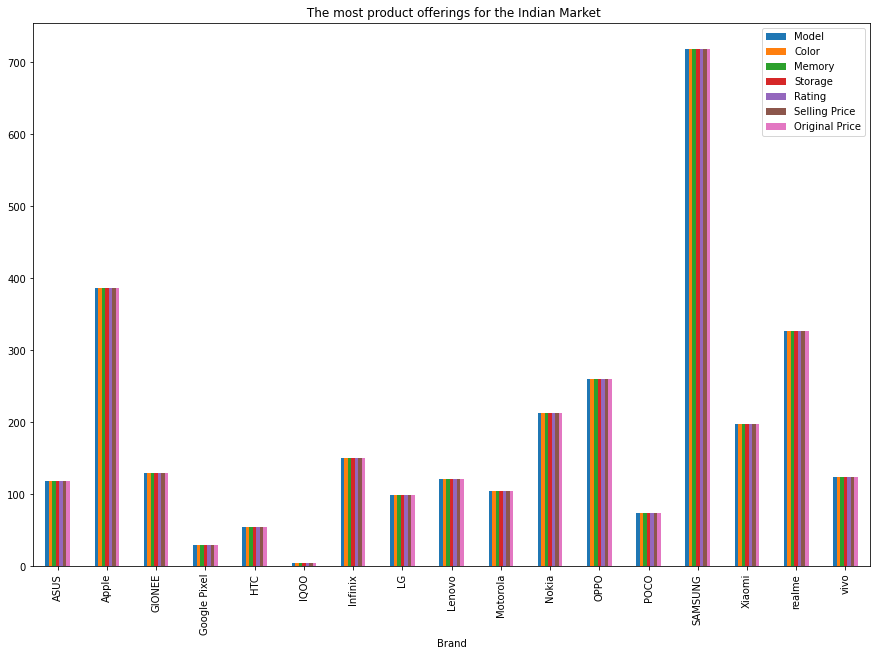

In [ ]:

g=df.groupby(['Brand']).count().plot(kind="bar",figsize=(15,10),title=' The most product offerings for the Indian Market')
g.plot()

The most offering products are samsung ,apple,realme etc...

In [ ]:
#categorizing three different segements:low mid premium

bins=[0,25000,50000,np.inf]
names=['low','mid','premium']
df['Segments']=pd.cut(df['Selling Price'],bins,labels=names)

In [ ]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Segments
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,low
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,low
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,low
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,low
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,low


In [ ]:
df1=df.groupby(['Segments']).count().reset_index()
df1

,Segments,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,low,2231,2231,2231,2231,2231,2231,2231,2231
1,mid,467,467,467,467,467,467,467,467
2,premium,416,416,416,416,416,416,416,416


In [ ]:
fig=px.pie(df1,values='Model',names='Segments',title='Brand catering to all different segments')
fig.show()

In [ ]:
Memory = df["Memory"].value_counts(ascending=False).reset_index()
Storage = df["Storage"].value_counts(ascending=False).reset_index()
Memory[0:1], Storage[0:1]

(  index  Memory
 0  4 GB     793,    index  Storage
 0  64 GB      813)

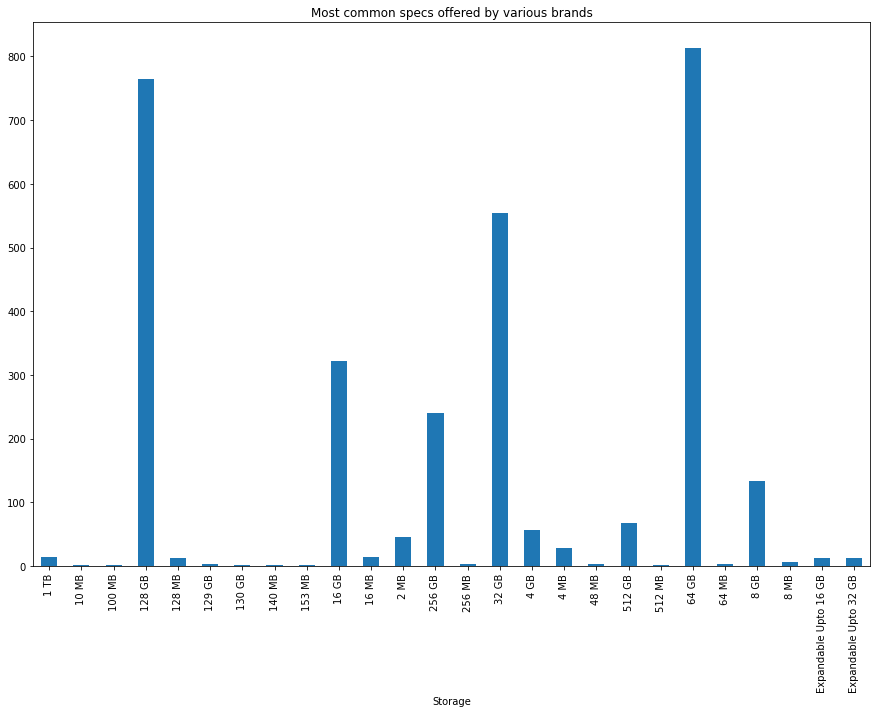

In [ ]:
df['Memory'].groupby(df['Storage']).count().plot(kind="bar",figsize=(15,10),title='Most common specs offered by various brands')

In [ ]:
fig=px.scatter(df,x='Rating',y='Segments',color='Brand',title='Compare premium offerings by top brands')
fig.show()

In [ ]:
colour=df["Color"].value_counts(ascending=False)[0:11].reset_index()
colour.columns=["colour","units"]
colour

,colour,units
0,Black,489
1,Gold,195
2,White,154
3,Blue,146
4,Silver,104
5,Red,82
6,Grey,44
7,Space Grey,36
8,Midnight Black,35
9,Rose Gold,30


In [ ]:
fig=px.bar(colour,x='colour',y='units',title='Most commonly offered colors by all Brands')
fig.show()

In [ ]:
comparing_spec1=df[(df["Brand"]=="SAMSUNG")]
comparing_spec2=df[(df["Brand"]=="Apple")]
comparing_specs=pd.concat([comparing_spec1,comparing_spec2])
comparing_specs

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
1484,SAMSUNG,Galaxy F22,Denim Blue,6 GB,128 GB,4.3,14999,16999
1485,SAMSUNG,Galaxy F22,Denim Blue,4 GB,64 GB,4.3,12999,14999
1486,SAMSUNG,Galaxy F22,Denim Black,6 GB,128 GB,4.3,14999,16999
1487,SAMSUNG,Galaxy F22,Denim Black,4 GB,64 GB,4.3,12999,14999
1488,SAMSUNG,Galaxy F12,Sky Blue,4 GB,64 GB,4.2,11499,12999
...,...,...,...,...,...,...,...,...
3054,Apple,iPhone 13 Pro Max,Silver,4GB,256 GB,4.7,139900,139900
3055,Apple,iPhone 13 Pro Max,Sierra Blue,4GB,512 GB,4.7,159900,159900
3056,Apple,iPhone 13 Pro Max,Gold,4GB,512 GB,4.7,159900,159900
3057,Apple,iPhone 13 Pro Max,Graphite,4GB,1 TB,4.7,179900,179900


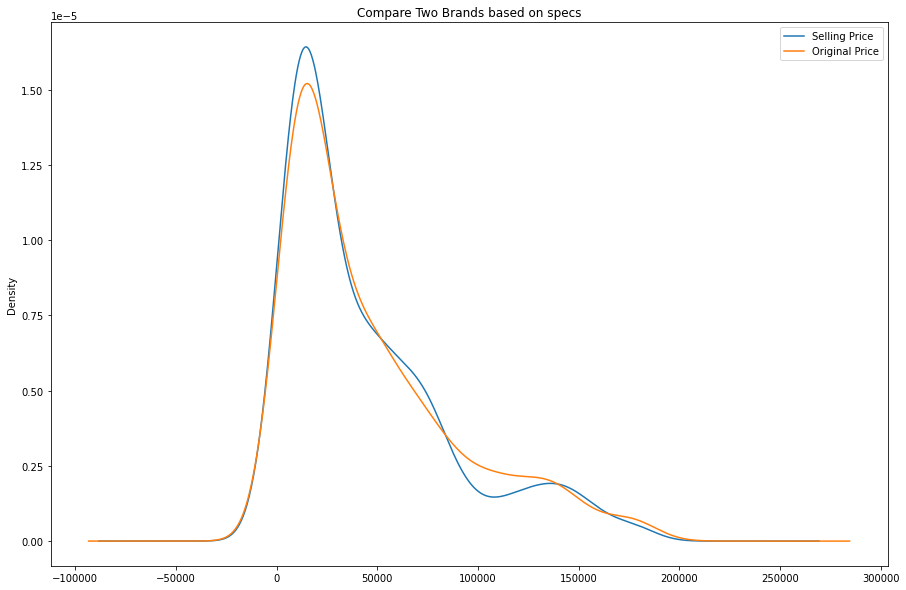

In [ ]:
comparing_specs.plot(kind="kde",figsize=(15,10),title='Compare Two Brands based on specs')


In [ ]:
fig=px.bar(df,x='Rating',y='Selling Price',color='Brand',title='Rating vs selling price')
fig.show()

we can not say that all higher rating mobiles are premium or expensive

In [ ]:
fig=px.bar(df,x='Rating',y='Brand',color='Brand',title='Rating vs Brand')
fig.show()

from the above graph we can not say brand is better than rating